In [135]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter
import copy

## Exploratory Data Analysis

In [136]:
# load data
dat = pd.read_csv("datasets/dat.csv", index_col = "Unnamed: 0")

# print info on dataframe
print("The dataset has {} rows and {} columns.".format(dat.shape[0], dat.shape[1]))
dat.head()

/Users/juliankleindiek/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3057: DtypeWarning: Columns (7) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
/Users/juliankleindiek/anaconda3/lib/python3.7/site-packages/numpy/lib/arraysetops.py:569: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


The dataset has 3777750 rows and 34 columns.


,event_id,latitude,longitude,date,STATE,EVENT_TYPE,TOR_F_SCALE,target,d,cc,...,TOR_LENGTH,TOR_WIDTH,BEGIN_LAT,BEGIN_LON,INJURIES_DIRECT,INJURIES_INDIRECT,DEATHS_DIRECT,DEATHS_INDIRECT,DAMAGE_PROPERTY,DAMAGE_CROPS
0,0,24.74,-124.779999,2015-01-02,HAWAII,Heavy Rain,NaN,1,-0.000008,0.0,...,NaN,NaN,21.564633,-158.380733,0.0,0.0,0.0,0.0,0.0,0.0
1,1,24.74,-123.939999,2015-01-02,NaN,NaN,NaN,0,-0.000013,0.0,...,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0
2,2,24.74,-123.099999,2015-01-02,NaN,NaN,NaN,0,0.000003,0.0,...,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0
3,3,24.74,-122.259999,2015-01-02,NaN,NaN,NaN,0,0.000005,0.0,...,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0
4,4,24.74,-121.419999,2015-01-02,NaN,NaN,NaN,0,0.000002,0.0,...,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0


## 1 Locaton outliers

In [137]:
# calculate errors
dat["err_lon"] = abs(dat["BEGIN_LON"] - dat["longitude"])
dat["err_lat"] = abs(dat["BEGIN_LAT"] - dat["latitude"])

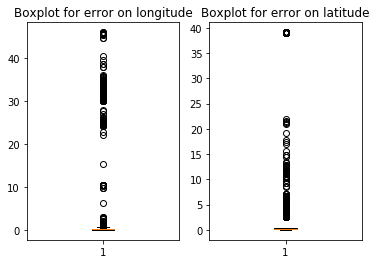

In [138]:
# investigate boxplots
f, (ax1, ax2) = plt.subplots(1,2)
ax1.boxplot(dat[dat["target"] == 1]["err_lon"])
ax1.set_title("Boxplot for error on longitude")
ax2.boxplot(dat[dat["target"] == 1]["err_lat"])
ax2.set_title("Boxplot for error on latitude")
plt.show()

In [139]:
# describe the errors for latitude and longitude
print(dat["err_lat"].describe())
print(dat["err_lon"].describe())

count    6.171900e+04
mean     2.670099e-01
std      1.040094e+00
min      2.288818e-07
25%      9.094643e-02
50%      1.899998e-01
75%      2.999998e-01
max      3.910290e+01
Name: err_lat, dtype: float64
count    61719.000000
mean         0.426573
std          2.788786
min          0.000001
25%          0.083201
50%          0.174901
75%          0.289999
max         46.125401
Name: err_lon, dtype: float64


In [140]:
# investigate outlier states
lon_outliers = dat[dat["err_lon"] > 1]
lat_outliers = dat[dat["err_lat"] > 1]

# print
print("The outliers for latitude are {} and for longitude {}".format(lat_outliers["STATE"].unique(), lon_outliers["STATE"].unique()))

The outliers for latitude are ['HAWAII' 'PUERTO RICO' 'VIRGIN ISLANDS' 'ALASKA' 'AMERICAN SAMOA'] and for longitude ['HAWAII' 'PUERTO RICO' 'VIRGIN ISLANDS' 'ALASKA' 'AMERICAN SAMOA']


- Outliers that are far away from mainland US need to be removed as we do not have accurate weather information on those remote locations.

In [141]:
# find outlier states outliers
outlier_states = lon_outliers["STATE"].unique()

# find non-outlier states
non_outlier_states = [i for i in dat["STATE"].unique() if i not in outlier_states]

# select non_outlier_states only
dat = copy.deepcopy(dat[dat["STATE"].isin(non_outlier_states)])

# reset index
dat.reset_index(inplace=True, drop=True)

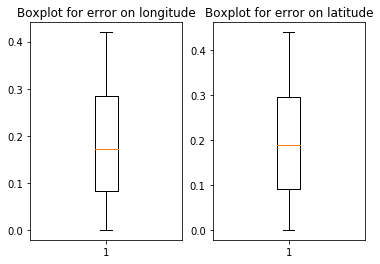

In [142]:
# investigate final boxplots
f, (ax1, ax2) = plt.subplots(1,2)
ax1.boxplot(dat[dat["target"] == 1]["err_lon"])
ax1.set_title("Boxplot for error on longitude")
ax2.boxplot(dat[dat["target"] == 1]["err_lat"])
ax2.set_title("Boxplot for error on latitude")
plt.show()

In [143]:
# investigate the error from the grid enlargement (one degree in lat/lon is approx 69 miles)
print("The error for longitude is {:.2f} miles and for latitude {:.2f} miles.".format(dat["err_lon"].mean() * 69, dat["err_lat"].mean() * 69))

# shape of dataset
print("The dataset now has {} rows and {} columns.".format(dat.shape[0], dat.shape[1]))

# balance of dataset
print("There are {} severe weather events, representing {:.2f}% of the total dataset.".format(len(dat[dat["target"] == 1]), len(dat[dat["target"] == 1])/len(dat)*100))

The error for longitude is 12.79 miles and for latitude 13.45 miles.
The dataset now has 3777094 rows and 36 columns.
There are 61063 severe weather events, representing 1.62% of the total dataset.
